In [53]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import SimpleRNN,Input,Activation,Reshape,LSTM,GRU,Conv2D,MaxPooling2D,Flatten,Embedding,Dense,Dropout,UpSampling2D
import torch
import keras
import matplotlib.pyplot as plt

In [3]:
x=np.array([1,1])

####  Toutology

In [4]:
def tout(x):
    weights = np.array([0,0])
    bias = 1
    y = np.dot(x,weights) + bias
    return y

In [5]:
print(tout(x))

1


#### Not Gate

In [ ]:
### AND Gate

X = np.array([[0,0],[0,1],[1,0],[1,1]])
weights = np.array([[1],[1]])
bias = np.array([-1])

out = X@weights + bias
y = np.array(list(map(step, out))).reshape(4,1)
print(y)

### OR Gate

X = np.array([[0,0],[0,1],[1,0],[1,1]])
weights = np.array([[1],[1]])
bias = np.array([0])

out = X@weights + bias
y = np.array(list(map(step, out))).reshape(4,1)
print(y)

### NOR Gate

X = np.array([[0,0],[0,1],[1,0],[1,1]])
weights = np.array([[-1],[-1]])
bias = np.array([1])

out = X@weights + bias
y = np.array(list(map(step, out))).reshape(4,1)
print(y)

### NAND Gate

X = np.array([[0,0],[0,1],[1,0],[1,1]])
weights = np.array([[-1],[-1]])
bias = np.array([2])

out = X@weights + bias
y = np.array(list(map(step, out))).reshape(4,1)
print(y)

### Perceptron Training

# Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[1],[1],[1],[1]])

# Initialize Random Weights
weights = np.random.rand(2,1)

# Step Function
def step(x):
    return 1 if x >= 0 else 0

# Training Loop
epoch = 10000
lr = 0.01

for _ in range(epoch):
    
    # Forward Pass
    y_cap = np.array(list(map(step,X@weights))).reshape(Y.shape)
    
    # Calculate Error
    error = Y - y_cap
    
    # Update Weights
    weights -= lr*(X.T@error)

print(f"Weights",weights,sep="\n",end="\n\n")
print(f"Output",y_cap,sep="\n")

### XOR 

1 Input Layer <br>
1 Hidden Layer - 2 Neurons <br>
1 Output Layer - 1 Neuron

In [2]:
def step(x):
    return 1 if x>0 else 0
step = np.vectorize(step)

In [3]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

w1 = np.array([[1,-1],[-1,1]])
w2 = np.array([[1],[1]])

y_cap = step(step(x@w1)@w2)
y_cap

array([[0],
       [1],
       [1],
       [0]])

### XNOR

1 Input Layer <br>
1 Hidden Layer - 2 Neurons <br>
1 Output Layer - 1 Neuron

In [4]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[1],[0],[0],[1]])

w1 = np.array([[1,-1],[1,-1]])
w2 = np.array([[1],[1]])

bias = np.array([[-1,1]])

y_cap = step(step(x@w1 + bias)@w2)
y_cap

array([[1],
       [0],
       [0],
       [1]])

In [56]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.boston_housing.load_data()

In [39]:
mean = x_train.mean()
x_train = x_train - mean
std = x_train.std()
x_train/=std

In [40]:
x_test -= mean
x_test /= std

In [41]:
x_test.shape

(102, 13)

### MODEL 1

In [42]:
model1 = Sequential()
model1.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model1.add(Dense(16,activation='relu'))
model1.add(Dense(1))
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model1.compile(optimizer=opt,loss='MAPE')
history1 = model1.fit(x=x_train,y=y_train,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
13/13 [==============================] - 1s 20ms/step - loss: 139.0666 - val_loss: 76.8312
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 62.1396 - val_loss: 50.8851
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 40.5181 - val_loss: 40.7767
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 33.1572 - val_loss: 37.7680
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 31.4480 - val_loss: 36.5413
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 31.0195 - val_loss: 35.9174
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8785 - val_loss: 35.6408
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8472 - val_loss: 35.6277
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8731 - val_loss: 35.5813
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.88

13/13 [==============================] - 0s 5ms/step - loss: 30.8687 - val_loss: 35.6392
Epoch 160/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8999 - val_loss: 35.6828
Epoch 161/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.9036 - val_loss: 35.7167
Epoch 162/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8701 - val_loss: 35.6338
Epoch 163/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8444 - val_loss: 35.6062
Epoch 164/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8521 - val_loss: 35.6851
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8936 - val_loss: 35.5382
Epoch 166/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8527 - val_loss: 35.4675
Epoch 167/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8959 - val_loss: 35.5292
Epoch 168/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.

Epoch 238/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8878 - val_loss: 35.5018
Epoch 239/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.9024 - val_loss: 35.5138
Epoch 240/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8548 - val_loss: 35.6048
Epoch 241/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8667 - val_loss: 35.6281
Epoch 242/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8901 - val_loss: 35.5833
Epoch 243/1000
13/13 [==============================] - 0s 7ms/step - loss: 30.8881 - val_loss: 35.5716
Epoch 244/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8928 - val_loss: 35.5634
Epoch 245/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8917 - val_loss: 35.5821
Epoch 246/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8511 - val_loss: 35.6377
Epoch 247/1000
13/13 [==============================] - 0s 5ms/s

Epoch 395/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8681 - val_loss: 35.5170
Epoch 396/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8503 - val_loss: 35.5639
Epoch 397/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8797 - val_loss: 35.5745
Epoch 398/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8720 - val_loss: 35.6541
Epoch 399/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8774 - val_loss: 35.5716
Epoch 400/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8492 - val_loss: 35.6589
Epoch 401/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8791 - val_loss: 35.7256
Epoch 402/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8610 - val_loss: 35.7026
Epoch 403/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8803 - val_loss: 35.7028
Epoch 404/1000
13/13 [==============================] - 0s 5ms/s

Epoch 552/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8601 - val_loss: 35.5780
Epoch 553/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8430 - val_loss: 35.7768
Epoch 554/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.9092 - val_loss: 35.6307
Epoch 555/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8544 - val_loss: 35.6067
Epoch 556/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8611 - val_loss: 35.5512
Epoch 557/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8740 - val_loss: 35.5886
Epoch 558/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8670 - val_loss: 35.5894
Epoch 559/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8985 - val_loss: 35.4746
Epoch 560/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8566 - val_loss: 35.5491
Epoch 561/1000
13/13 [==============================] - 0s 5ms/s

Epoch 631/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8941 - val_loss: 35.5044
Epoch 632/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8569 - val_loss: 35.5466
Epoch 633/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8838 - val_loss: 35.7231
Epoch 634/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.9026 - val_loss: 35.8089
Epoch 635/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8608 - val_loss: 35.7164
Epoch 636/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8614 - val_loss: 35.7182
Epoch 637/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8687 - val_loss: 35.5937
Epoch 638/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8510 - val_loss: 35.7007
Epoch 639/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8905 - val_loss: 35.5314
Epoch 640/1000
13/13 [==============================] - 0s 5ms/s

Epoch 710/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8680 - val_loss: 35.5985
Epoch 711/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8616 - val_loss: 35.5598
Epoch 712/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8405 - val_loss: 35.5246
Epoch 713/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8885 - val_loss: 35.4741
Epoch 714/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8708 - val_loss: 35.5285
Epoch 715/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8887 - val_loss: 35.4948
Epoch 716/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8732 - val_loss: 35.6099
Epoch 717/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8576 - val_loss: 35.5293
Epoch 718/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.9023 - val_loss: 35.4941
Epoch 719/1000
13/13 [==============================] - 0s 6ms/s

Epoch 789/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8896 - val_loss: 35.5909
Epoch 790/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8546 - val_loss: 35.5278
Epoch 791/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8579 - val_loss: 35.5770
Epoch 792/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8716 - val_loss: 35.4964
Epoch 793/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8483 - val_loss: 35.5234
Epoch 794/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8712 - val_loss: 35.5128
Epoch 795/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8874 - val_loss: 35.6443
Epoch 796/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8665 - val_loss: 35.5265
Epoch 797/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8500 - val_loss: 35.6704
Epoch 798/1000
13/13 [==============================] - 0s 5ms/s

Epoch 868/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8898 - val_loss: 35.5241
Epoch 869/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8862 - val_loss: 35.5432
Epoch 870/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8427 - val_loss: 35.5804
Epoch 871/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8500 - val_loss: 35.6093
Epoch 872/1000
13/13 [==============================] - 0s 7ms/step - loss: 30.8794 - val_loss: 35.6082
Epoch 873/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8620 - val_loss: 35.5350
Epoch 874/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8794 - val_loss: 35.5336
Epoch 875/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.9158 - val_loss: 35.5653
Epoch 876/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8658 - val_loss: 35.5948
Epoch 877/1000
13/13 [==============================] - 0s 5ms/s

Epoch 947/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.9450 - val_loss: 35.5770
Epoch 948/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8601 - val_loss: 35.6581
Epoch 949/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8635 - val_loss: 35.6832
Epoch 950/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8889 - val_loss: 35.7555
Epoch 951/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8686 - val_loss: 35.5988
Epoch 952/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8589 - val_loss: 35.5829
Epoch 953/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8489 - val_loss: 35.6916
Epoch 954/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8964 - val_loss: 35.6285
Epoch 955/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8970 - val_loss: 35.6889
Epoch 956/1000
13/13 [==============================] - 0s 4ms/s

### MODEL 2 - Early Stopping

In [47]:
model2 = Sequential()
model2.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model2.add(Dense(1))

es = EarlyStopping(monitor='loss',mode='min',patience=25)
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)

model2.compile(optimizer=opt,loss='MAPE')
history2 = model2.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test),callbacks=[es])

Epoch 1/1000
13/13 [==============================] - 1s 13ms/step - loss: 99.5559 - val_loss: 95.2041
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 91.8190 - val_loss: 86.2072
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 82.2448 - val_loss: 75.0067
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 70.3085 - val_loss: 63.6074
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 57.2590 - val_loss: 55.3847
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 48.2394 - val_loss: 50.6813
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 42.9846 - val_loss: 47.2100
Epoch 8/1000
13/13 [==============================] - 0s 6ms/step - loss: 40.0991 - val_loss: 45.2596
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 38.3169 - val_loss: 43.7570
Epoch 10/1000
13/13 [==============================] - 0s 7ms/step - loss: 36.757

13/13 [==============================] - 0s 5ms/step - loss: 20.0562 - val_loss: 24.7235
Epoch 160/1000
13/13 [==============================] - 0s 4ms/step - loss: 20.0572 - val_loss: 24.7400
Epoch 161/1000
13/13 [==============================] - 0s 5ms/step - loss: 20.1147 - val_loss: 24.6927
Epoch 162/1000
13/13 [==============================] - 0s 5ms/step - loss: 20.1488 - val_loss: 24.6829
Epoch 163/1000
13/13 [==============================] - 0s 5ms/step - loss: 20.0648 - val_loss: 24.7523
Epoch 164/1000
13/13 [==============================] - 0s 4ms/step - loss: 20.1678 - val_loss: 24.6222
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 20.0385 - val_loss: 24.5923
Epoch 166/1000
13/13 [==============================] - 0s 4ms/step - loss: 20.0584 - val_loss: 24.6451
Epoch 167/1000
13/13 [==============================] - 0s 5ms/step - loss: 20.0774 - val_loss: 24.5883
Epoch 168/1000
13/13 [==============================] - 0s 4ms/step - loss: 20.

Epoch 238/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.7376 - val_loss: 24.6741
Epoch 239/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.6731 - val_loss: 24.3250
Epoch 240/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.7182 - val_loss: 24.2961
Epoch 241/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.5740 - val_loss: 24.3500
Epoch 242/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.6820 - val_loss: 24.4054
Epoch 243/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.6501 - val_loss: 24.4375
Epoch 244/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.5314 - val_loss: 24.6045
Epoch 245/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.6467 - val_loss: 24.3853
Epoch 246/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.5867 - val_loss: 24.4360
Epoch 247/1000
13/13 [==============================] - 0s 4ms/s

Epoch 317/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.2973 - val_loss: 24.0571
Epoch 318/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.2024 - val_loss: 24.3514
Epoch 319/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.2863 - val_loss: 24.0761
Epoch 320/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.4778 - val_loss: 24.1323
Epoch 321/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.2092 - val_loss: 24.1110
Epoch 322/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.2640 - val_loss: 24.1559
Epoch 323/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.2643 - val_loss: 24.1191
Epoch 324/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.2625 - val_loss: 24.1046
Epoch 325/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.3276 - val_loss: 24.1135
Epoch 326/1000
13/13 [==============================] - 0s 4ms/s

Epoch 396/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.1027 - val_loss: 23.9524
Epoch 397/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.0640 - val_loss: 23.8583
Epoch 398/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.0687 - val_loss: 23.8508
Epoch 399/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.0263 - val_loss: 23.8202
Epoch 400/1000
13/13 [==============================] - 0s 5ms/step - loss: 18.9840 - val_loss: 23.8715
Epoch 401/1000
13/13 [==============================] - 0s 5ms/step - loss: 18.9910 - val_loss: 23.7915
Epoch 402/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.0753 - val_loss: 23.7519
Epoch 403/1000
13/13 [==============================] - 0s 5ms/step - loss: 18.9339 - val_loss: 23.9147
Epoch 404/1000
13/13 [==============================] - 0s 5ms/step - loss: 18.9712 - val_loss: 23.7844
Epoch 405/1000
13/13 [==============================] - 0s 5ms/s

### Linear Regression

In [57]:
n = x_train.shape[0]
x_train = torch.tensor(x_train,dtype=torch.float)
y_train = torch.tensor(y_train,dtype=torch.float)
x_test = torch.tensor(x_test,dtype=torch.float)
y_test = torch.tensor(y_test,dtype=torch.float)

In [58]:
datasets = torch.utils.data.TensorDataset(x_train,y_train)

In [60]:
train_iter = torch.utils.data.DataLoader(datasets,batch_size=10,shuffle=True)

In [61]:
loss = torch.nn.MSELoss()

In [65]:
weight_n = x_train.shape[1]
net = torch.nn.Sequential(torch.nn.Linear(weight_n,1))
torch.nn.init.normal(net)
torch.nn.init.constant_(net[0].bias, val=0)

In [ ]:
num_epochs = 1000
for epoch in range(num_epochs):
    for x, y in train_iter:
        output = net(x)
        l = loss(output, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print("epoch {} loss: {:.4f}".format(epoch + 1, l.item()))

### MNIST

In [6]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [130]:
# y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)

In [131]:
model3 = Sequential()
model3.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',
                 input_shape=(28,28,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(256,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10,activation='softmax'))

In [132]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [133]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [134]:
model3.compile(optimizer=opt,loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [135]:
history3 = model3.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 82s 43ms/step - loss: 1.2103 - accuracy: 0.6760 - val_loss: 0.5152 - val_accuracy: 0.8803
Epoch 2/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.5239 - accuracy: 0.8495 - val_loss: 0.3456 - val_accuracy: 0.9106
Epoch 3/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.4109 - accuracy: 0.8797 - val_loss: 0.2873 - val_accuracy: 0.9215
Epoch 4/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.3562 - accuracy: 0.8955 - val_loss: 0.2519 - val_accuracy: 0.9279
Epoch 5/10
1875/1875 [==============================] - 87s 47ms/step - loss: 0.3183 - accuracy: 0.9056 - val_loss: 0.2267 - val_accuracy: 0.9338
Epoch 6/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2914 - accuracy: 0.9142 - val_loss: 0.2070 - val_accuracy: 0.9388
Epoch 7/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2682 - accuracy: 0.9209 - val_loss: 0.1912 -

### ANN

In [149]:
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(256, activation = "relu"))
model4.add(Dense(64, activation = "softmax"))

In [150]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [151]:
model4.compile(optimizer=opt,loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [152]:
history4 = model4.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1)

1875/1875 [==============================] - 9s 4ms/step - loss: 2.2841 - accuracy: 0.5383 - val_loss: 1.1263 - val_accuracy: 0.8137


### RNN

In [195]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

In [196]:
(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

((25000,), (25000,), (25000,), (25000,))

In [197]:
from keras.utils import pad_sequences
x_train = pad_sequences(x_train,maxlen=300)
x_test = pad_sequences(x_test,maxlen=300)

In [198]:
model5 = Sequential()
model5.add(Embedding(10000,32,input_length=(300)))
model5.add(SimpleRNN(16,activation='relu'))
model5.add(Dense(1,activation='sigmoid'))

In [199]:
model5.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 300, 32)           320000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_45 (Dense)            (None, 1)                 17        
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 320,801
Trainable params: 320,801
Non-trainable params: 0
_________________________________________________________________


In [200]:
(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

((25000, 300), (25000,), (25000, 300), (25000,))

In [201]:
model5.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [202]:
history5 = model5.fit(x_train,y_train,epochs=10)

Epoch 1/10
782/782 [==============================] - 63s 79ms/step - loss: 0.5746 - accuracy: 0.6969
Epoch 2/10
782/782 [==============================] - 62s 80ms/step - loss: 0.3633 - accuracy: 0.8478
Epoch 3/10
782/782 [==============================] - 61s 78ms/step - loss: 0.2910 - accuracy: 0.8816
Epoch 4/10
782/782 [==============================] - 61s 78ms/step - loss: 0.2431 - accuracy: 0.9042
Epoch 5/10
782/782 [==============================] - 66s 84ms/step - loss: 0.2202 - accuracy: 0.9171
Epoch 6/10
782/782 [==============================] - 65s 83ms/step - loss: 0.2014 - accuracy: 0.9266
Epoch 7/10
782/782 [==============================] - 62s 79ms/step - loss: 0.1791 - accuracy: 0.9326
Epoch 8/10
782/782 [==============================] - 63s 81ms/step - loss: 0.1707 - accuracy: 0.9374
Epoch 9/10
782/782 [==============================] - 61s 78ms/step - loss: 0.1568 - accuracy: 0.9427
Epoch 10/10
782/782 [==============================] - 58s 74ms/step - loss: 0.143

### LSTM 

In [208]:
model6 = Sequential()
model6.add(Embedding(10000,input_length=(300),output_dim=32))
model6.add(LSTM(128))
model6.add(Dense(1,activation='sigmoid'))

In [209]:
model6.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [211]:
history6 = model6.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
 34/782 [>.............................] - ETA: 3:41 - loss: 0.6928 - accuracy: 0.5303

KeyboardInterrupt: 

### GRU

In [212]:
model7 = Sequential()
model7.add(Embedding(10000,input_length=(300),output_dim=32))
model7.add(GRU(128))
model7.add(Dense(1,activation='sigmoid'))

In [213]:
model7.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history7 = model7.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

### AutoEncoder

In [113]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [122]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

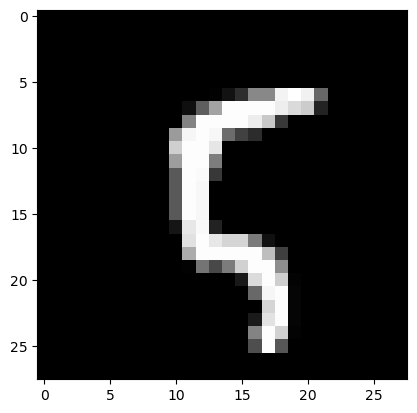

In [123]:
plt.imshow(x_train[100],cmap='gray')
plt.show()

In [124]:
encoder = Sequential()
encoder.add(Flatten(input_shape=(28,28)))
encoder.add(Dense(256,activation='relu'))
encoder.add(Dropout(0.25))
encoder.add(Dense(128,activation='relu'))
encoder.add(Dropout(0.25))
encoder.add(Dense(64,activation='relu'))
encoder.add(Dropout(0.25))
encoder.add(Dense(32,activation='relu'))

In [125]:
decoder = Sequential()
decoder.add(Dense(64,input_shape=(32,),activation='relu'))
decoder.add(Dropout(0.25))
decoder.add(Dense(128,activation='relu'))
decoder.add(Dropout(0.25))
decoder.add(Dense(256,activation='relu'))
decoder.add(Dropout(0.25))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape((28,28)))

In [126]:
x_train.shape

(60000, 28, 28, 1)

In [127]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model8 = Model(inputs=img,outputs=output)
model8.compile('adam',loss='binary_crossentropy')

In [128]:
img.shape

TensorShape([None, 28, 28])

In [129]:
encoder(x_train)

<tf.Tensor: shape=(60000, 32), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , ..., 0.        , 0.01359682,
        0.09271489],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.17927001],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06265103,
        0.13783547],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.17481732],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14350685]], dtype=float32)>

In [130]:
for epoch in range(10):
    model8.fit(x_train,x_train)

 609/1875 [========>.....................] - ETA: 10s - loss: 0.2478

KeyboardInterrupt: 

#### Anomaly

In [ ]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
# Fixing Threshold 

reconstruction_error_digit = []
reconstruction_error_fashion = []

for i in x_test[:100]:
    error =  model8.evaluate([i], [i], verbose=0)[0]
    reconstruction_error_digit.append(error)
    
for i in X_test[:100]:
    error = model8.evaluate([i], [i], verbose=0)[0]
    reconstruction_error_fashion.append(error)
    
reconstruction_error_digit = np.array(reconstruction_error_digit)
reconstruction_error_fashion = np.array(reconstruction_error_fashion)

In [ ]:
threshold = [reconstruction_error_digit.mean() - 2*reconstruction_error_digit.std(), reconstruction_error_digit.mean() + 2*reconstruction_error_digit.std()]

In [ ]:
def detect_anomaly(image):
    
    error = autoencoder.evaluate([image], [image], verbose=0)[0]
    
    if error >= threshold[0] and error <= threshold[1]:
        print("Noice !!!")
        return 0
    else:
        print("Anomaly Detected")
        return 1

### TEXT Generation

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding

In [2]:
with open('/Downloads/poems.txt', 'r', encoding='utf-8') as file:
    text_data = file.read()

In [3]:
chars = sorted(set(text_data))
char_to_num = {char: num for num, char in enumerate(chars)}
num_to_char = {num: char for num, char in enumerate(chars)}

numerical_text = [char_to_num[char] for char in text_data]

In [4]:
sequence_length = 100
step_size = 3

sequences = []
next_chars = []

for i in range(0, len(numerical_text) - sequence_length, step_size):
    sequences.append(numerical_text[i:i + sequence_length])
    next_chars.append(numerical_text[i + sequence_length])

X = np.array(sequences)
y = np.array(next_chars)

In [5]:
model = Sequential([
    Embedding(input_dim=len(chars), output_dim=256, input_length=sequence_length),
    GRU(512, return_sequences=True),
    GRU(512),
    Dense(len(chars), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 256)          13056     
                                                                 
 gru (GRU)                   (None, 100, 512)          1182720   
                                                                 
 gru_1 (GRU)                 (None, 512)               1575936   
                                                                 
 dense (Dense)               (None, 51)                26163     
                                                                 
Total params: 2797875 (10.67 MB)
Trainable params: 2797875 (10.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
def sample_next_character(predictions, temperature=1.0):
    predictions = np.asarray(predictions).astype('float64')
    predictions = np.log(predictions) / temperature
    exp_predictions = np.exp(predictions)
    probabilities = exp_predictions / np.sum(exp_predictions)
    sampled_index = np.random.choice(len(predictions), p=probabilities)
    return sampled_index


In [41]:
def generate_text(seed_text, length, temperature=1.0):
    generated_text = seed_text

    for _ in range(length):
        # Ensure the input is of the correct length
        sampled_input = [char_to_num.get(char, 0) for char in generated_text[-sequence_length:]]
        if len(sampled_input) < sequence_length:
            sampled_input = [0] * (sequence_length - len(sampled_input)) + sampled_input
        sampled_input = np.array(sampled_input)
        sampled_input = np.reshape(sampled_input, (1, sequence_length))

        predictions = model.predict(sampled_input, verbose=0)[0]
        next_index = sample_next_character(predictions, temperature)
        next_char = num_to_char[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

    return generated_text


In [38]:
class PlateauLR(tf.keras.callbacks.Callback):
    def __init__(self, patience=3, factor=0.5, min_lr=1e-6):
        super(PlateauLR, self).__init__()
        self.patience = patience
        self.factor = factor
        self.min_lr = min_lr
        self.wait = 0
        self.best_loss = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('loss')

        if current_loss is None:
            return

        if current_loss < self.best_loss:
            self.best_loss = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                lr = tf.keras.backend.get_value(self.model.optimizer.lr)
                lr *= self.factor
                lr = max(lr, self.min_lr)
                tf.keras.backend.set_value(self.model.optimizer.lr, lr)
                self.wait = 0

# Define the PlateauLR instance
plateau_lr = PlateauLR()

# Training the model
model.fit(X, y, batch_size=batch_size, epochs=epochs, callbacks=[loss_callback, plateau_lr])

Epoch 1/15
5/5 [==============================] - 17s 3s/step - loss: 0.1222
Epoch 2/15
5/5 [==============================] - 17s 3s/step - loss: 0.1002
Epoch 3/15
5/5 [==============================] - 17s 3s/step - loss: 0.0698
Epoch 4/15
5/5 [==============================] - 18s 3s/step - loss: 0.0585
Epoch 5/15
5/5 [==============================] - 18s 4s/step - loss: 0.0431
Epoch 6/15
5/5 [==============================] - 25s 5s/step - loss: 0.0373
Epoch 7/15
5/5 [==============================] - 22s 4s/step - loss: 0.0317
Epoch 8/15
5/5 [==============================] - 19s 4s/step - loss: 0.0248
Epoch 9/15
5/5 [==============================] - 18s 4s/step - loss: 0.0224
Epoch 10/15
5/5 [==============================] - 18s 4s/step - loss: 0.0192
Epoch 11/15
5/5 [==============================] - 24s 5s/step - loss: 0.0169
Epoch 12/15
5/5 [==============================] - 21s 4s/step - loss: 0.0153
Epoch 13/15
5/5 [==============================] - 18s 4s/step - loss: 0.

In [42]:
seed_text = "The quick brown fox jumps over the lazy dog"
generated_text = generate_text(seed_text, length=300, temperature=0.5)
print(generated_text)

 and and the doul for the ot laspt asd the 
